In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf

In [4]:
x_data = np.linspace(0.0,10.0, 1000000)

In [5]:
noise = np.random.randn(len(x_data))

In [6]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [7]:
noise

array([-0.59860701, -0.47061123,  0.7040692 , ..., -0.29404931,
       -0.82123394,  0.92768023])

In [8]:
y_true = (0.5 * x_data) + 5 + noise

In [9]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [10]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [11]:
y_df.head()

,Y
0,4.401393
1,4.529394
2,5.704079
3,5.577564
4,6.214247


In [12]:
my_data = pd.concat([x_df,y_df],axis = 1)

In [13]:
my_data

,X Data,Y
0,0.00000,4.401393
1,0.00001,4.529394
2,0.00002,5.704079
3,0.00003,5.577564
4,0.00004,6.214247
5,0.00005,5.517418
6,0.00006,5.820934
7,0.00007,5.695970
8,0.00008,4.892279
9,0.00009,4.072614


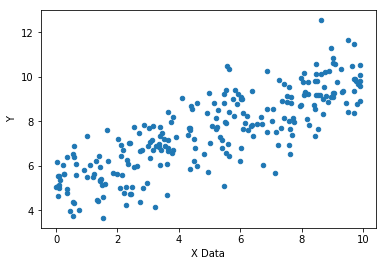

In [16]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [19]:
batch_size = 13

In [20]:
np.random.randn(2)

array([0.31463155, 1.62630974])

In [22]:
m = tf.Variable(0.31463155)
b = tf.Variable(1.62630974)

In [23]:
xph = tf.placeholder(tf.float32,[batch_size])

In [24]:
yph = tf.placeholder(tf.float32,[batch_size])

In [25]:
y_model = m*xph + b

In [26]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [30]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)

In [32]:
train = optimizer.minimize(error)

In [33]:
init = tf.global_variables_initializer()

In [46]:
with tf.Session() as Sess:
    Sess.run(init)
    batches = 10000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        Sess.run(train,feed_dict = feed)
    model_m,model_b = Sess.run([m,b])

In [47]:
model_m

0.54958355

In [48]:
model_b

5.0553856

In [49]:
y_hat = x_data * model_m + model_b

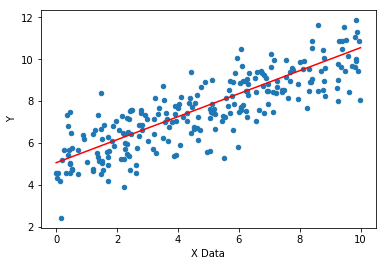

In [50]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')